### Attribute description for german

Attribute 1:  (qualitative)
	       Status of existing checking account
               A11 :      ... <    0 DM
	       A12 : 0 <= ... <  200 DM
	       A13 :      ... >= 200 DM /
		     salary assignments for at least 1 year
               A14 : no checking account

Attribute 2:  (numerical)
	      Duration in month

Attribute 3:  (qualitative)
	      Credit history
	      A30 : no credits taken/
		    all credits paid back duly
              A31 : all credits at this bank paid back duly
	      A32 : existing credits paid back duly till now
              A33 : delay in paying off in the past
	      A34 : critical account/
		    other credits existing (not at this bank)

Attribute 4:  (qualitative)
	      Purpose
	      A40 : car (new)
	      A41 : car (used)
	      A42 : furniture/equipment
	      A43 : radio/television
	      A44 : domestic appliances
	      A45 : repairs
	      A46 : education
	      A47 : (vacation - does not exist?)
	      A48 : retraining
	      A49 : business
	      A410 : others

Attribute 5:  (numerical)
	      Credit amount

Attibute 6:  (qualitative)
	      Savings account/bonds
	      A61 :          ... <  100 DM
	      A62 :   100 <= ... <  500 DM
	      A63 :   500 <= ... < 1000 DM
	      A64 :          .. >= 1000 DM
              A65 :   unknown/ no savings account

Attribute 7:  (qualitative)
	      Present employment since
	      A71 : unemployed
	      A72 :       ... < 1 year
	      A73 : 1  <= ... < 4 years  
	      A74 : 4  <= ... < 7 years
	      A75 :       .. >= 7 years

Attribute 8:  (numerical)
	      Installment rate in percentage of disposable income

Attribute 9:  (qualitative)
	      Personal status and sex
	      A91 : male   : divorced/separated
	      A92 : female : divorced/separated/married
              A93 : male   : single
	      A94 : male   : married/widowed
	      A95 : female : single

Attribute 10: (qualitative)
	      Other debtors / guarantors
	      A101 : none
	      A102 : co-applicant
	      A103 : guarantor

Attribute 11: (numerical)
	      Present residence since

Attribute 12: (qualitative)
	      Property
	      A121 : real estate
	      A122 : if not A121 : building society savings agreement/
				   life insurance
              A123 : if not A121/A122 : car or other, not in attribute 6
	      A124 : unknown / no property

Attribute 13: (numerical)
	      Age in years

Attribute 14: (qualitative)
	      Other installment plans 
	      A141 : bank
	      A142 : stores
	      A143 : none

Attribute 15: (qualitative)
	      Housing
	      A151 : rent
	      A152 : own
	      A153 : for free

Attribute 16: (numerical)
              Number of existing credits at this bank

Attribute 17: (qualitative)
	      Job
	      A171 : unemployed/ unskilled  - non-resident
	      A172 : unskilled - resident
	      A173 : skilled employee / official
	      A174 : management/ self-employed/
		     highly qualified employee/ officer

Attribute 18: (numerical)
	      Number of people being liable to provide maintenance for

Attribute 19: (qualitative)
	      Telephone
	      A191 : none
	      A192 : yes, registered under the customers name

Attribute 20: (qualitative)
	      foreign worker
	      A201 : yes
	      A202 : no


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option("display.max_rows",1200)
pd.set_option("display.max_columns",22)

sns.set(font_scale=3)

In [2]:
df = pd.read_csv("germancreditclean.csv")

In [3]:
df.head()

,customer_id,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,other_signators,time_in_residence,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit
0,6156361,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,1
1,2051359,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,0
2,8740590,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,0
3,3924540,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,1
4,3115687,A14,36,A32,A46,9055,A65,A73,2,A93,A101,4,A124,35,A143,A153,1,A172,2,A192,A201,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 22 columns):
customer_id                 1011 non-null int64
checking_account_status     1011 non-null object
loan_duration_mo            1011 non-null int64
credit_history              1011 non-null object
purpose                     1011 non-null object
loan_amount                 1011 non-null int64
savings_account_balance     1011 non-null object
time_employed_yrs           1011 non-null object
payment_pcnt_income         1011 non-null int64
gender_status               1011 non-null object
other_signators             1011 non-null object
time_in_residence           1011 non-null int64
property                    1011 non-null object
age_yrs                     1011 non-null int64
other_credit_outstanding    1011 non-null object
home_ownership              1011 non-null object
number_loans                1011 non-null int64
job_category                1011 non-null object
dependents        

In [5]:
df.describe()

,customer_id,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents,bad_credit
count,1.011000e+03,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000
mean,5.418868e+06,20.868447,3267.196835,2.969337,2.841741,35.552918,1.406528,1.155292,0.298714
std,2.567433e+06,12.028247,2818.261437,1.118720,1.105646,11.357116,0.580131,0.362362,0.457921
min,1.018706e+06,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,3.213826e+06,12.000000,1365.000000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,5.490556e+06,18.000000,2315.000000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000
75%,7.534566e+06,24.000000,3972.500000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,9.994482e+06,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


In [6]:
df.shape

(1011, 22)

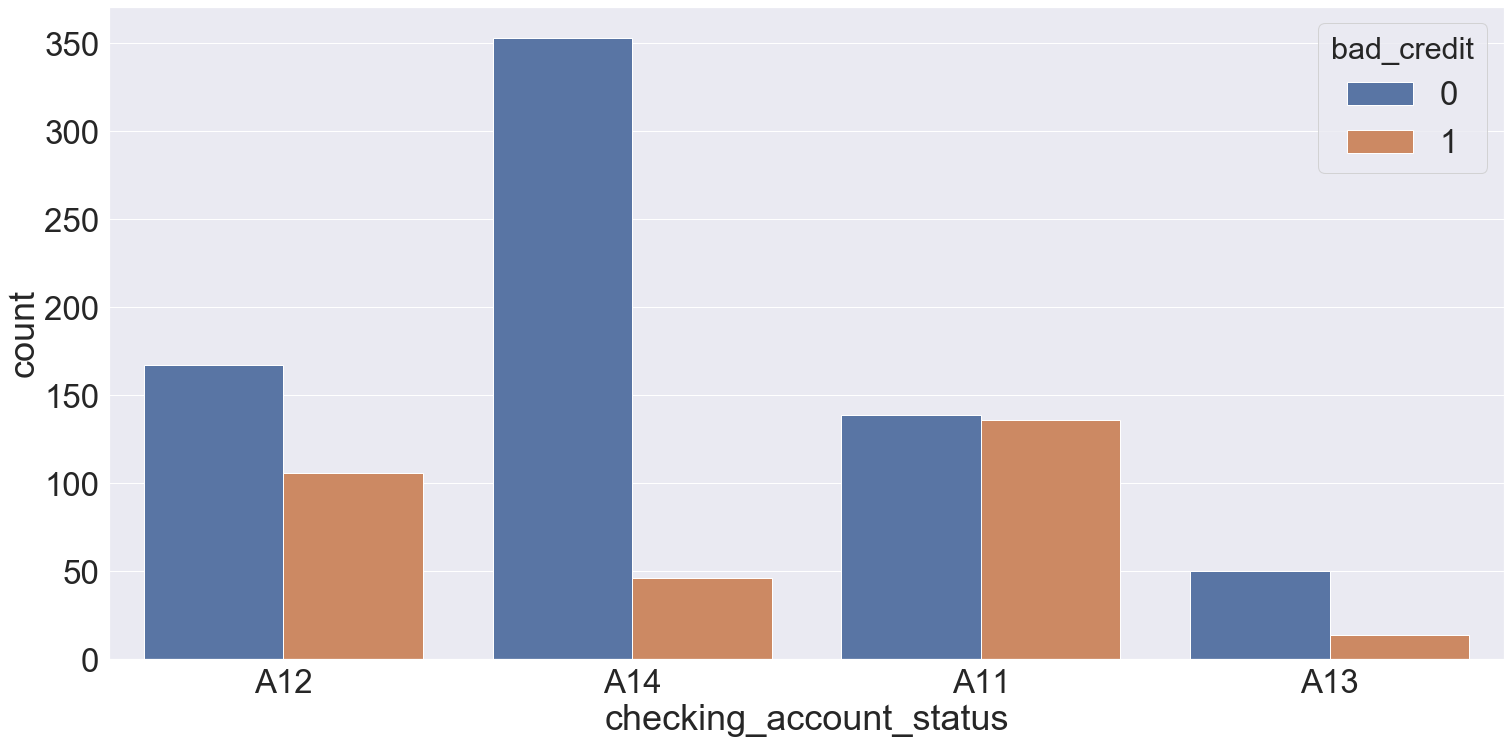

In [7]:
plt.figure(figsize=(25,12))
sns.countplot(x='checking_account_status',data=df, hue='bad_credit')
plt.show()

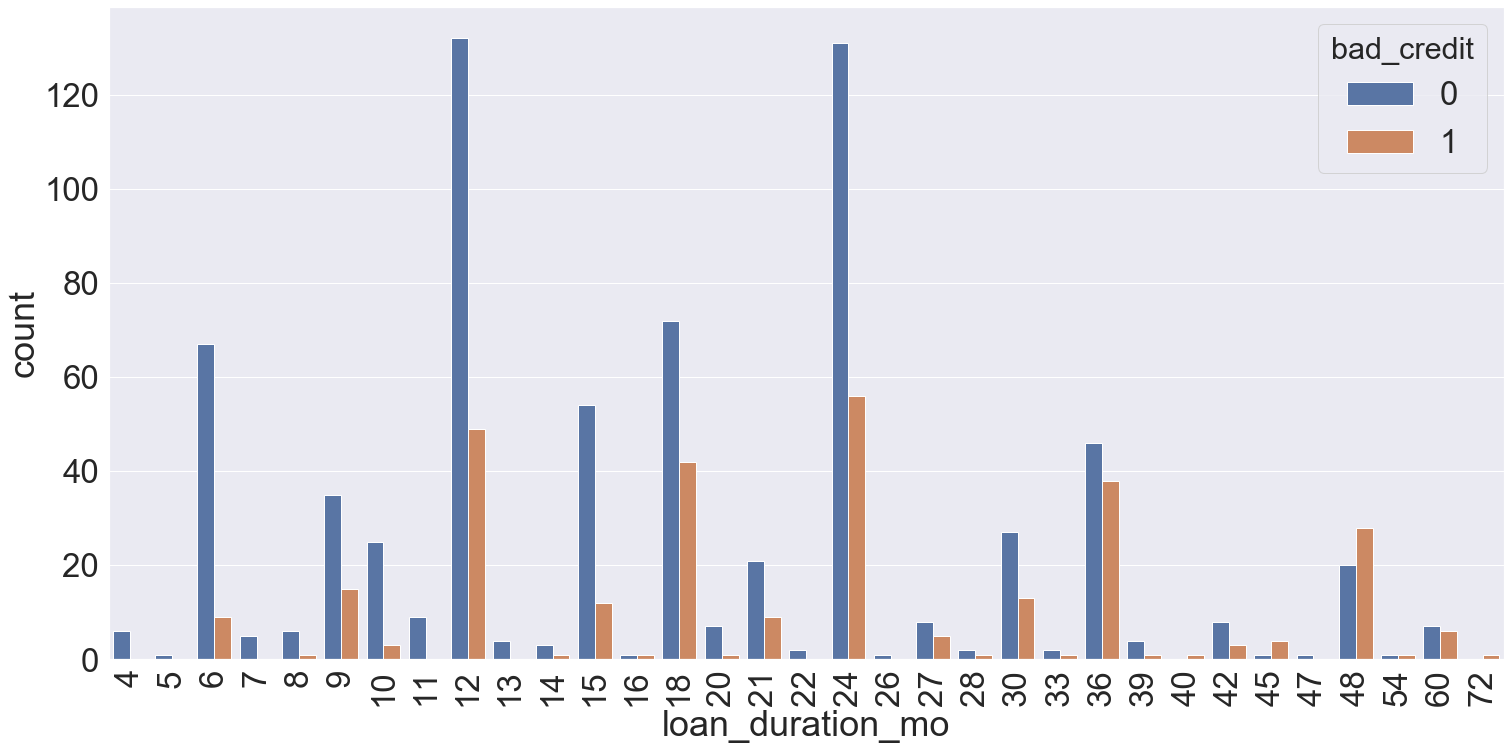

In [8]:
plt.figure(figsize=(25,12))
sns.countplot(x='loan_duration_mo',data=df, hue='bad_credit')
plt.xticks(rotation=90)
plt.show()

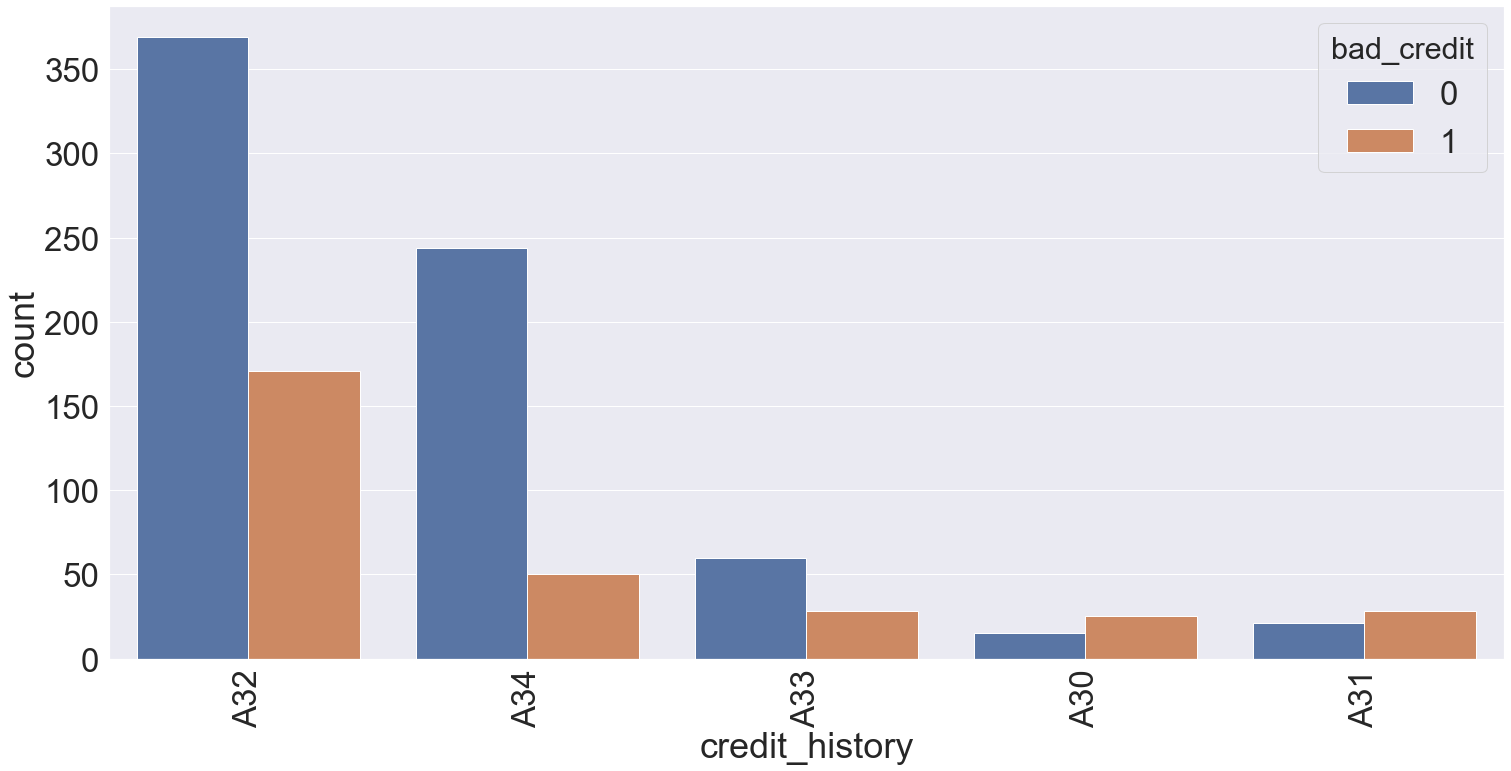

In [9]:
plt.figure(figsize=(25,12))
sns.countplot(x='credit_history',data=df, hue='bad_credit')
plt.xticks(rotation=90)
plt.show()

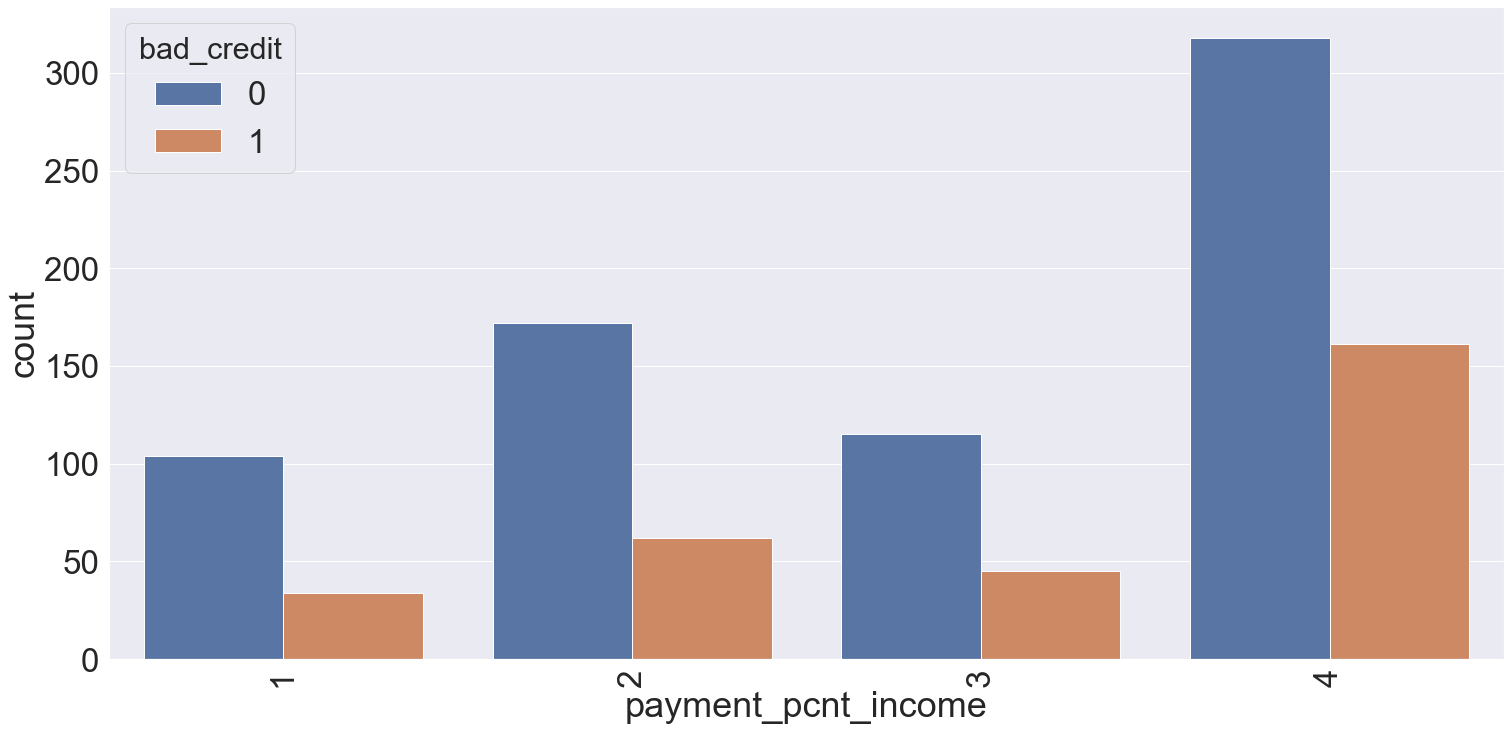

In [10]:
plt.figure(figsize=(25,12))
sns.countplot(x='payment_pcnt_income',data=df,hue='bad_credit')
plt.xticks(rotation=90)
plt.show()

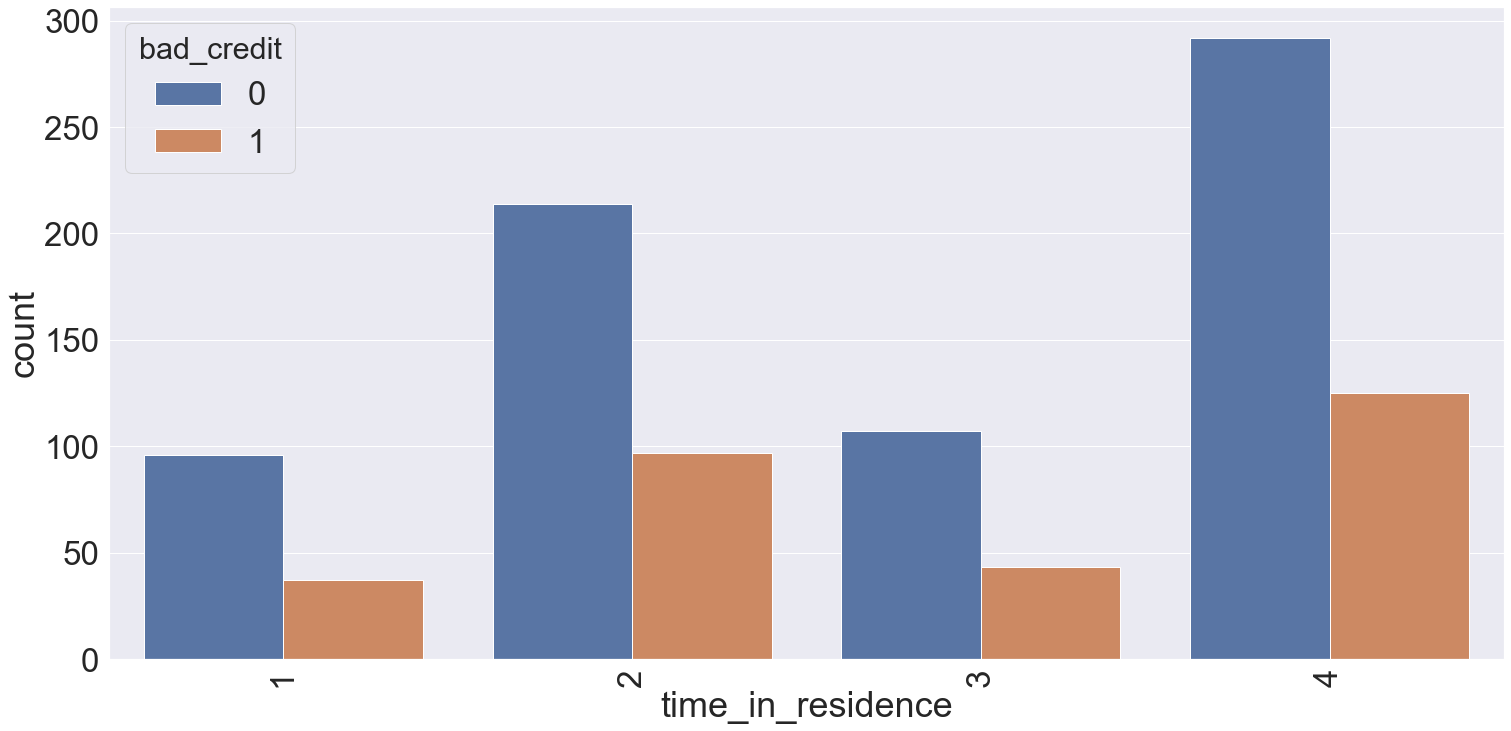

In [11]:
plt.figure(figsize=(25,12))
sns.countplot(x='time_in_residence',data=df, hue='bad_credit')
plt.xticks(rotation=90)
plt.show()

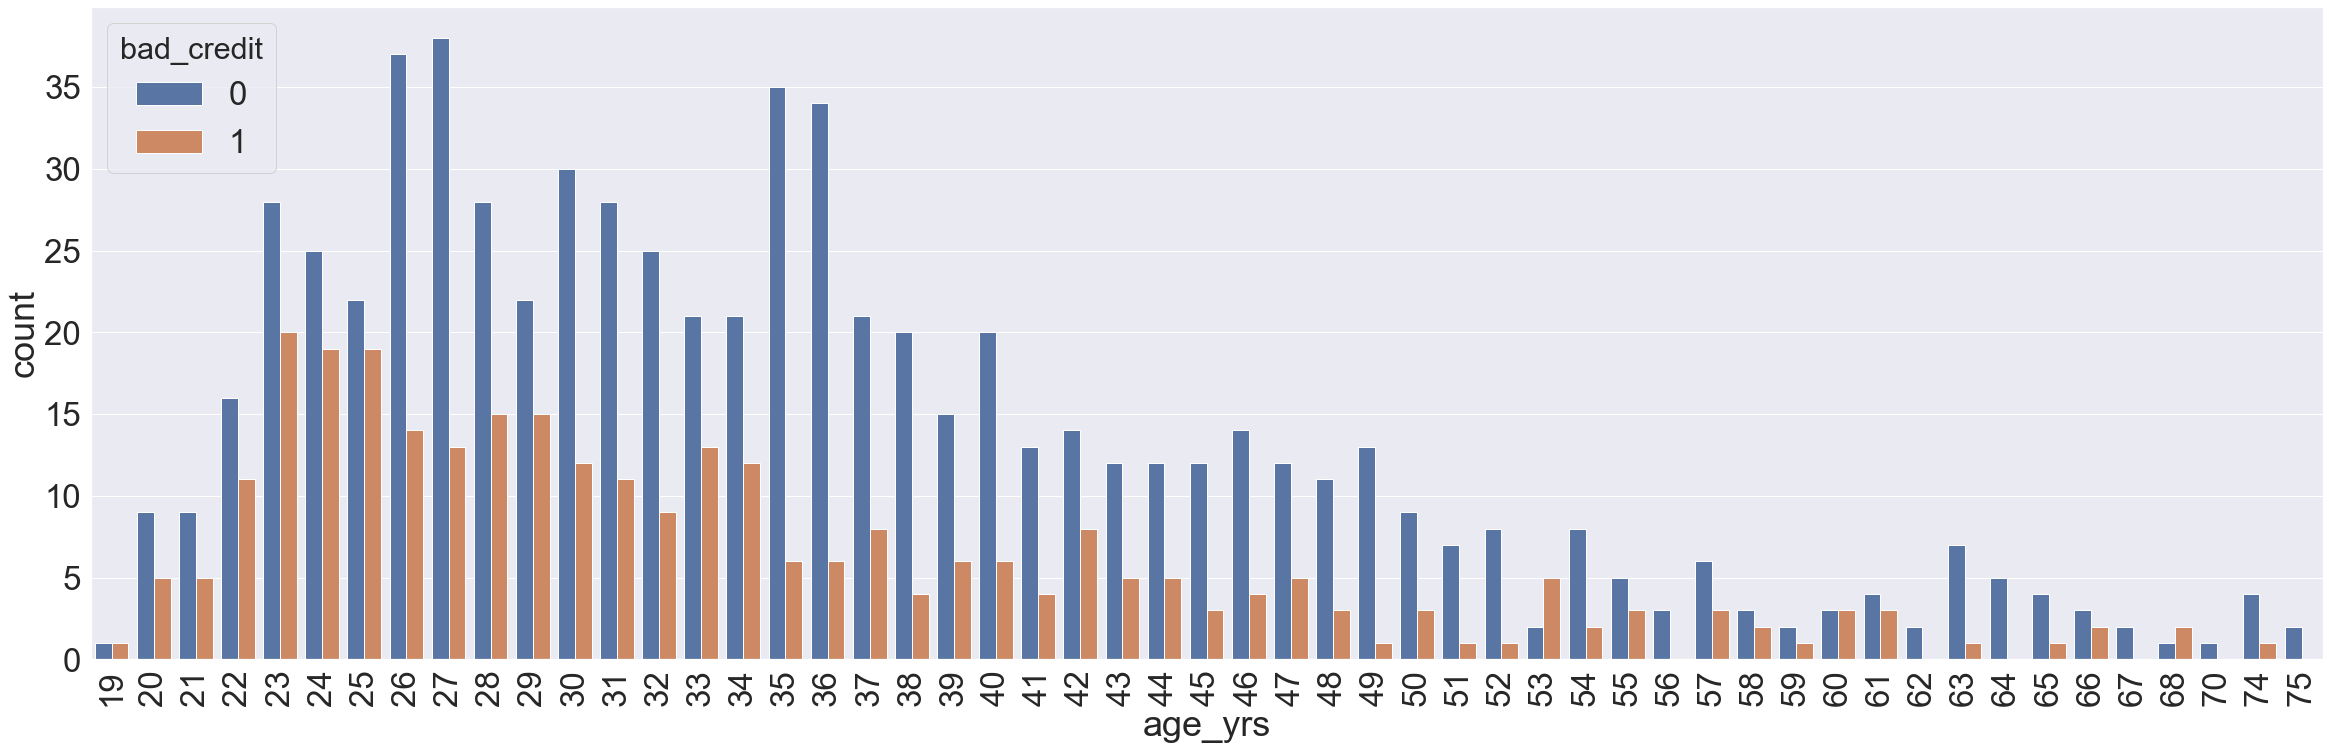

In [12]:
plt.figure(figsize=(40,12))
sns.countplot(x='age_yrs',data=df, hue='bad_credit' )
plt.xticks(rotation=90)
plt.show()

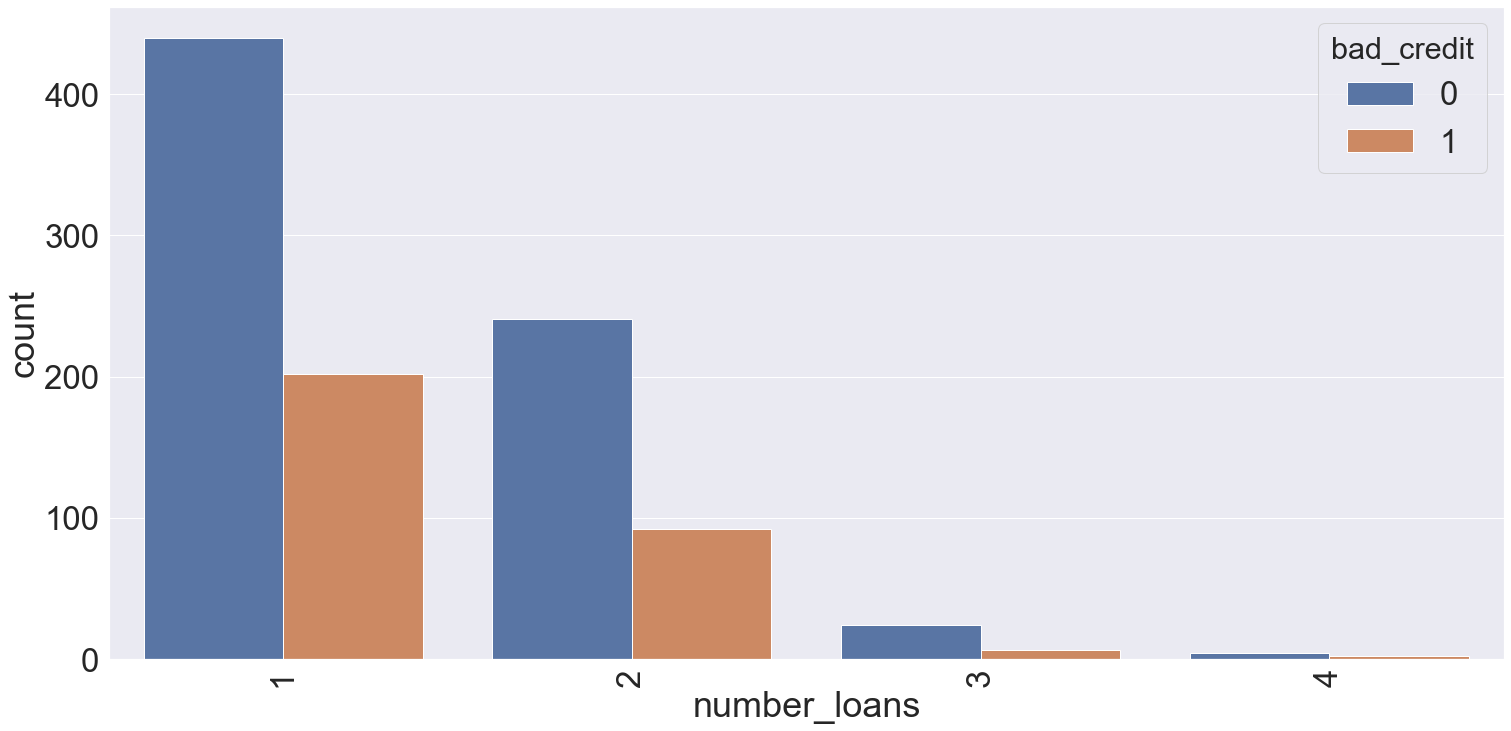

In [13]:
plt.figure(figsize=(25,12))
sns.countplot(x='number_loans',data=df, hue='bad_credit')
plt.xticks(rotation=90)
plt.show()

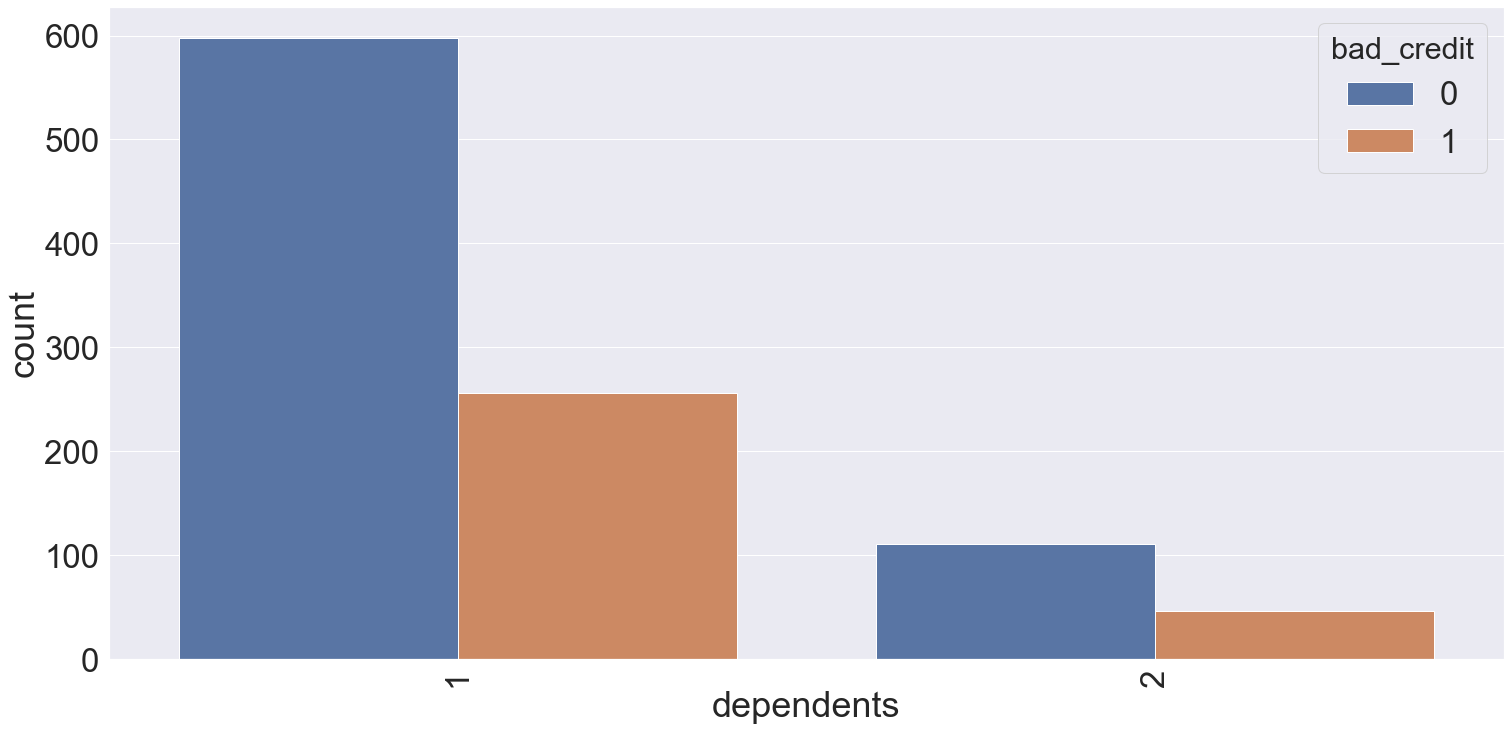

In [14]:
plt.figure(figsize=(25,12))
sns.countplot(x='dependents',data=df,  hue='bad_credit')
plt.xticks(rotation=90)
plt.show()

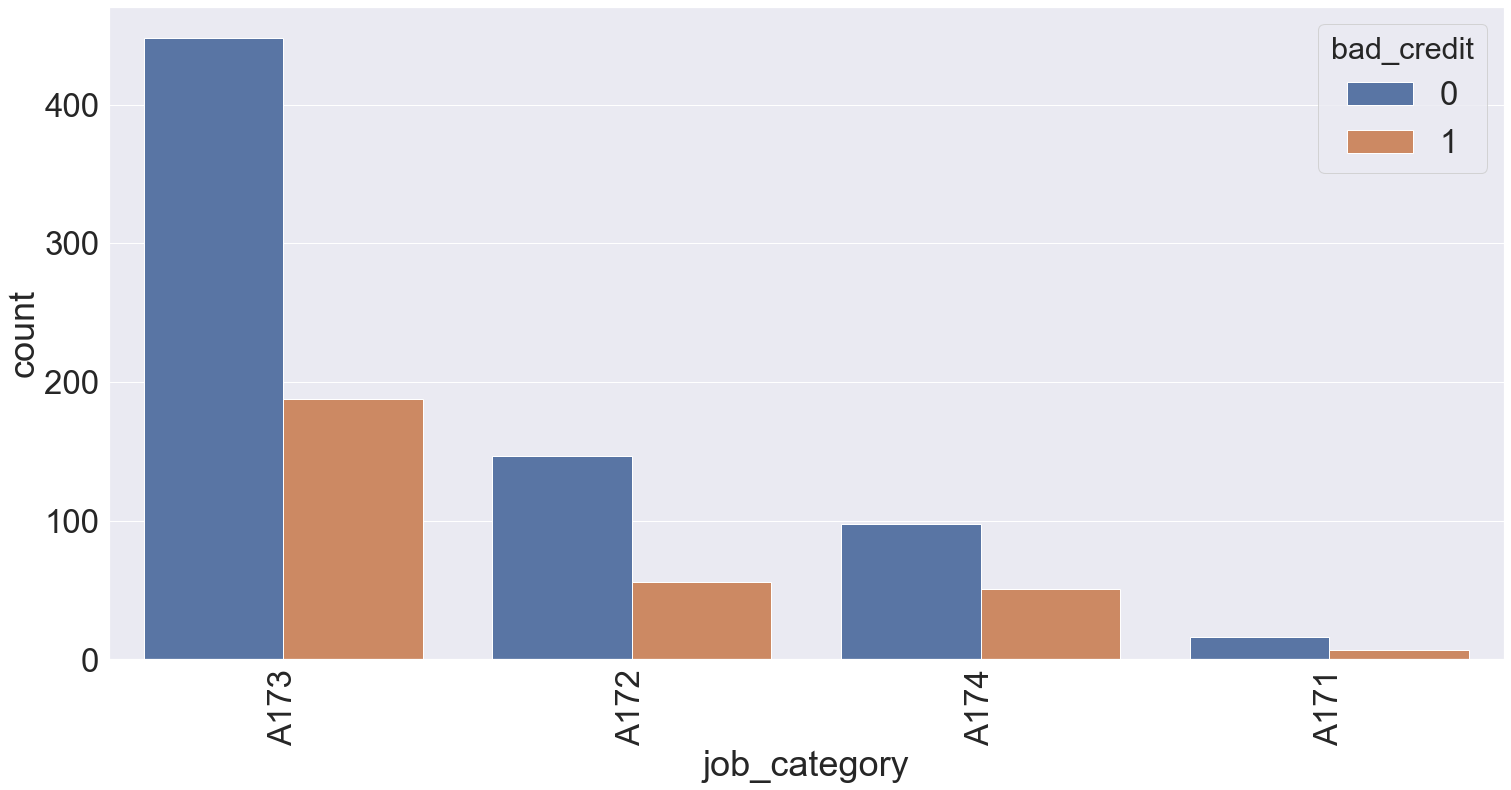

In [15]:
plt.figure(figsize=(25,12))
sns.countplot(x='job_category',data=df,  hue='bad_credit')
plt.xticks(rotation=90)
plt.show()

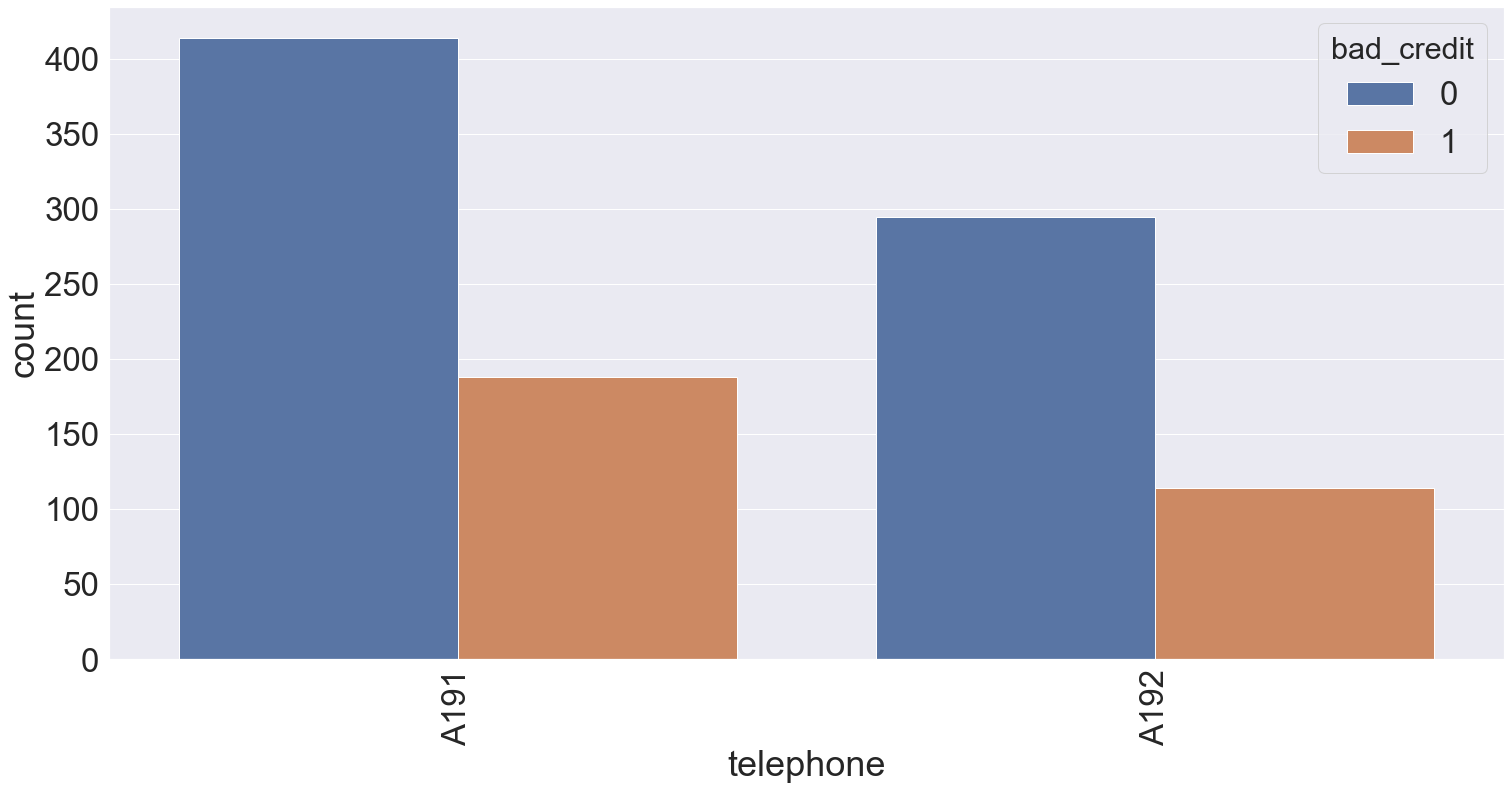

In [16]:
plt.figure(figsize=(25,12))
sns.countplot(x='telephone',data=df,  hue='bad_credit')
plt.xticks(rotation=90)
plt.show()

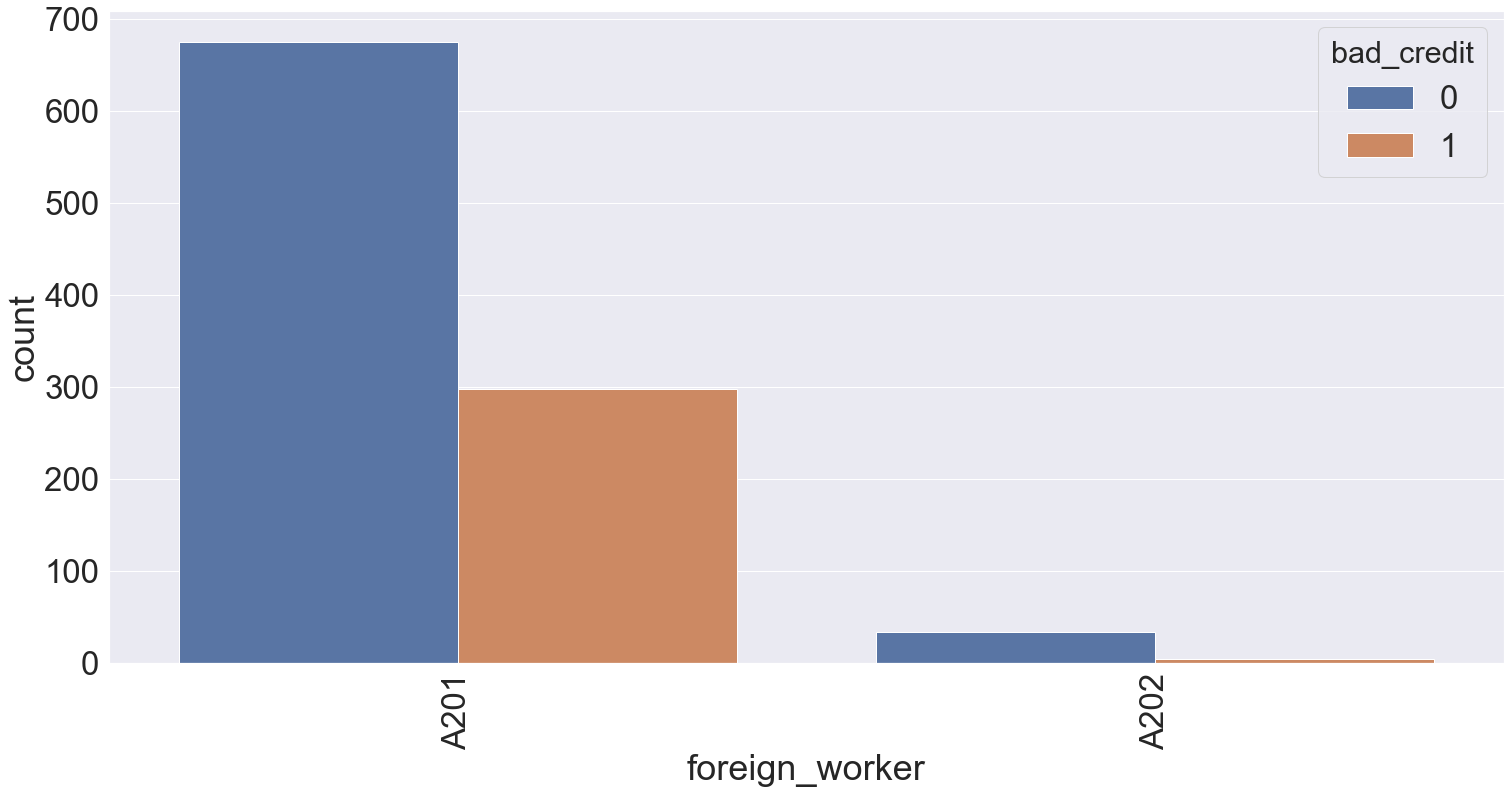

In [17]:
plt.figure(figsize=(25,12))
sns.countplot(x='foreign_worker',data=df,  hue='bad_credit')
plt.xticks(rotation=90)
plt.show()

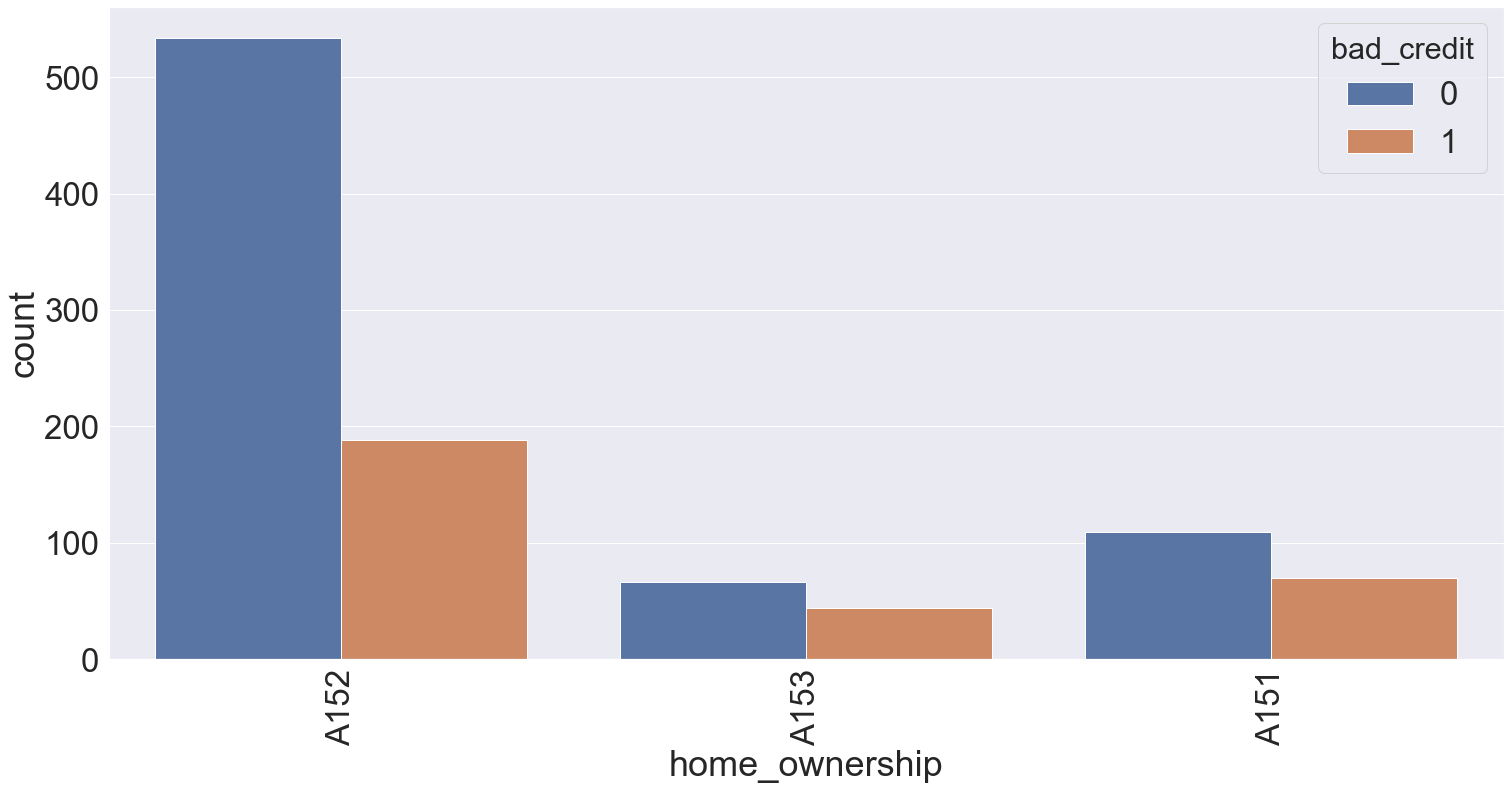

In [18]:
plt.figure(figsize=(25,12))
sns.countplot(x='home_ownership',data=df,  hue='bad_credit')
plt.xticks(rotation=90)
plt.show()

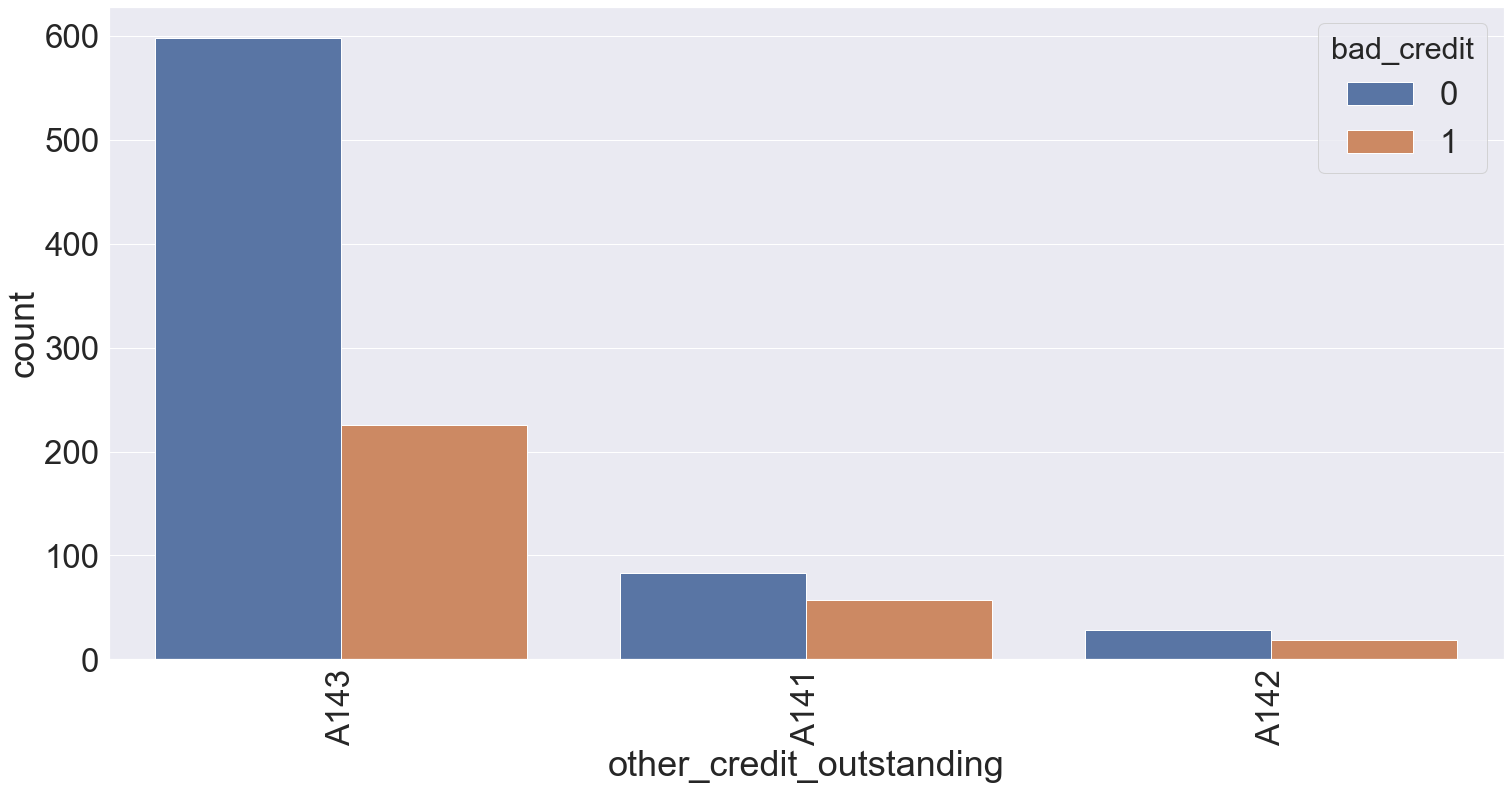

In [19]:
plt.figure(figsize=(25,12))
sns.countplot(x='other_credit_outstanding',data=df,  hue='bad_credit')
plt.xticks(rotation=90)
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 22 columns):
customer_id                 1011 non-null int64
checking_account_status     1011 non-null object
loan_duration_mo            1011 non-null int64
credit_history              1011 non-null object
purpose                     1011 non-null object
loan_amount                 1011 non-null int64
savings_account_balance     1011 non-null object
time_employed_yrs           1011 non-null object
payment_pcnt_income         1011 non-null int64
gender_status               1011 non-null object
other_signators             1011 non-null object
time_in_residence           1011 non-null int64
property                    1011 non-null object
age_yrs                     1011 non-null int64
other_credit_outstanding    1011 non-null object
home_ownership              1011 non-null object
number_loans                1011 non-null int64
job_category                1011 non-null object
dependents        

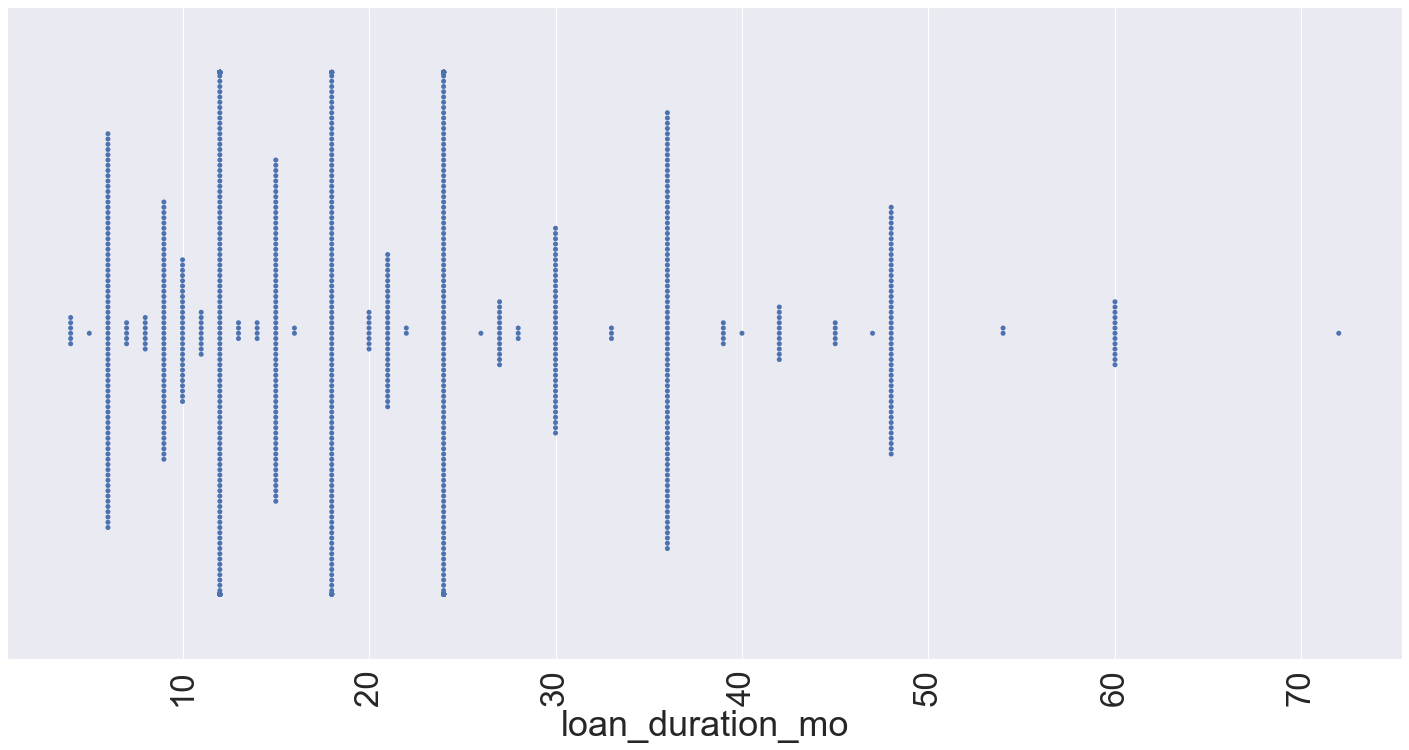

In [29]:
plt.figure(figsize=(25,12))
sns.swarmplot(x='loan_duration_mo',hue='bad_credit',data=df)
plt.xticks(rotation=90)
plt.show()

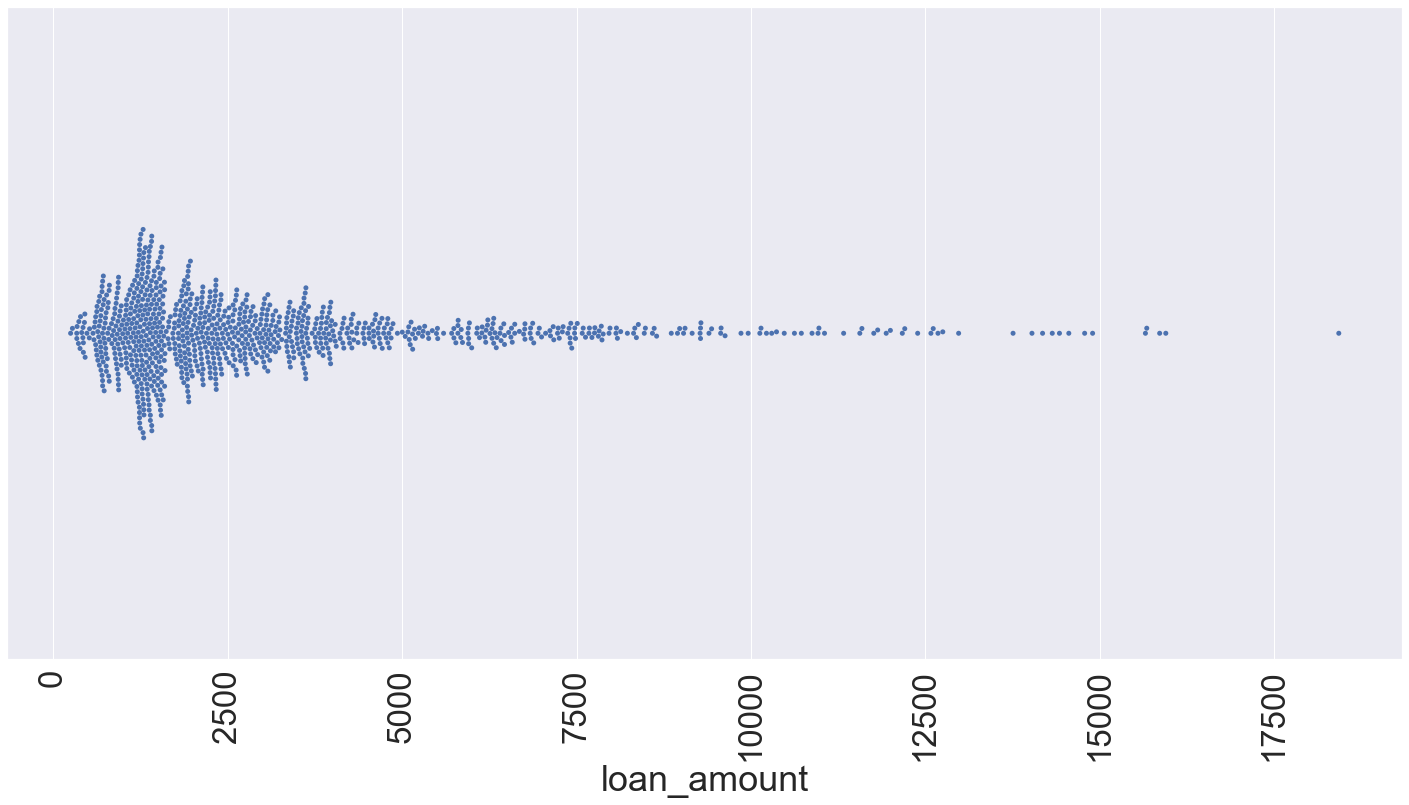

In [30]:
plt.figure(figsize=(25,12))
sns.swarmplot(x='loan_amount',hue='bad_credit',data=df)
plt.xticks(rotation=90)
plt.show()